In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import numpy as np

# Load and preprocess data

file = '/content/drive/MyDrive/Data Science Data Challenge/CHAMPS(Processed).csv'
data = pd.read_csv(file)


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Evaluate models using cross-validation and out-of-sample data
results = {}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    cv_mean = cv_scores.mean()

    # Out-of-sample evaluation
    model.fit(X_train_selected, y_train)
    test_score = model.score(X_test_selected, y_test)

    results[model_name] = {'cv_mean': cv_mean, 'test_score': test_score}

# Select the best-performing model
best_model_name = max(results, key=lambda k: results[k]['test_score'])
best_model_cv_mean = results[best_model_name]['cv_mean']
best_model_test_score = results[best_model_name]['test_score']

print("Model Evaluation Results:")
for model_name, result in results.items():
    print(f"{model_name}: CV Mean = {result['cv_mean']:.4f}, Test Score = {result['test_score']:.4f}")

print(f"\nBest Model: {best_model_name}")
print(f"Best Model CV Mean: {best_model_cv_mean:.4f}")
print(f"Best Model Test Score: {best_model_test_score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

Model Evaluation Results:
Logistic Regression: CV Mean = 0.9879, Test Score = 1.0000
SVM: CV Mean = 0.9941, Test Score = 1.0000
AdaBoost: CV Mean = 1.0000, Test Score = 1.0000
Random Forest: CV Mean = 1.0000, Test Score = 1.0000
Gradient Boosting: CV Mean = 1.0000, Test Score = 1.0000
XGBoost: CV Mean = 1.0000, Test Score = 1.0000

Best Model: Logistic Regression
Best Model CV Mean: 0.9879
Best Model Test Score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

Model Evaluation Results:
Logistic Regression: CV Mean = 0.9878787878787879, Test Score = 1.0000
SVM: CV Mean = 0.9941176470588236, Test Score = 1.0000
AdaBoost: CV Mean = 1.0, Test Score = 1.0000
Random Forest: CV Mean = 1.0, Test Score = 1.0000
Gradient Boosting: CV Mean = 1.0, Test Score = 1.0000
XGBoost: CV Mean = 1.0, Test Score = 1.0000
Ensemble: CV Mean = None, Test Score = 1.0000


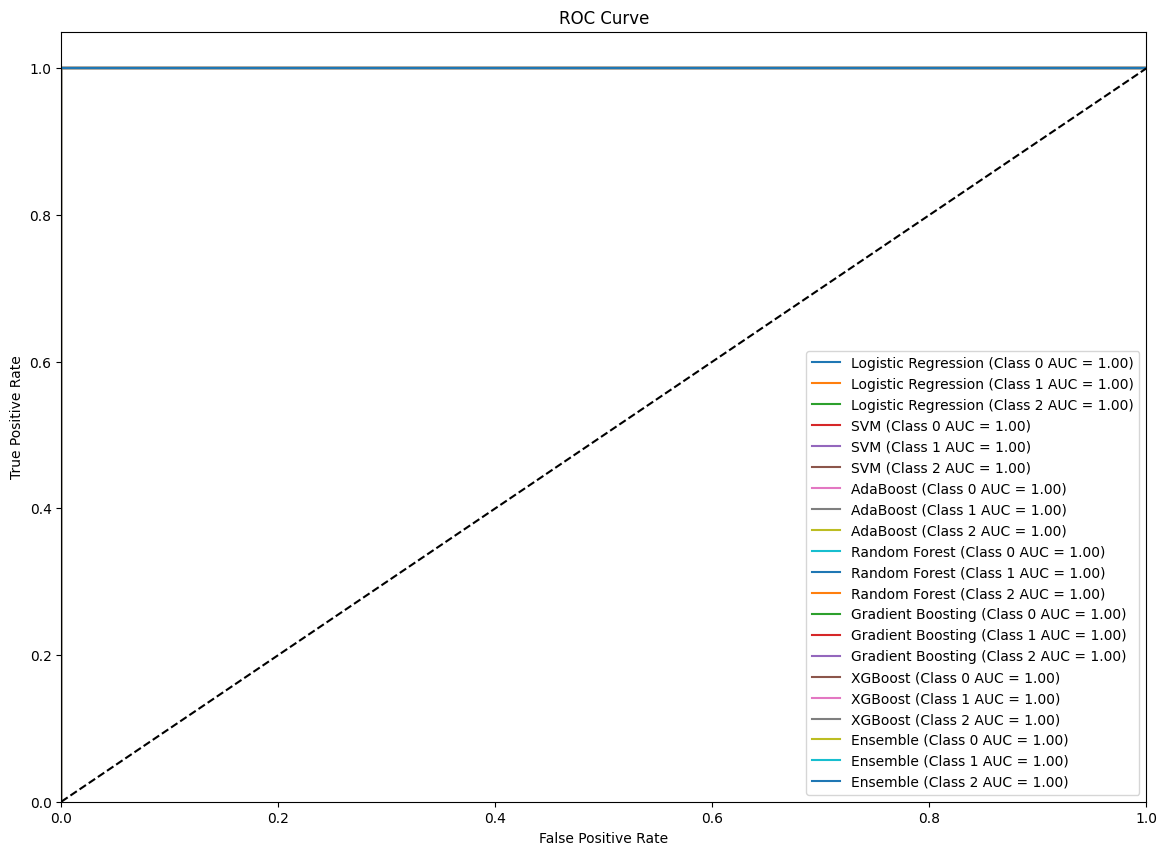

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Binarize the output for ROC computation
y_train_binarized = label_binarize(y_train, classes=np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_train_binarized.shape[1]

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train each model and evaluate their performance
results = {}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    cv_mean = cv_scores.mean()

    # Out-of-sample evaluation
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    test_score = accuracy_score(y_test, y_pred)

    results[model_name] = {'cv_mean': cv_mean, 'test_score': test_score, 'model': model}

# Ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[(name, model['model']) for name, model in results.items()], voting='soft')
ensemble_model.fit(X_train_selected, y_train)
ensemble_pred = ensemble_model.predict(X_test_selected)
ensemble_score = accuracy_score(y_test, ensemble_pred)
results['Ensemble'] = {'cv_mean': None, 'test_score': ensemble_score, 'model': ensemble_model}

# Print model evaluation results
print("Model Evaluation Results:")
for model_name, result in results.items():
    print(f"{model_name}: CV Mean = {result['cv_mean']}, Test Score = {result['test_score']:.4f}")

# Plot ROC and AUC curves for each class
plt.figure(figsize=(14, 10))

for model_name, result in results.items():
    model = result['model']
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_selected)
    else:
        y_score = model.decision_function(X_test_selected)

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (Class {i} AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [4]:
# Print model evaluation results
print("Model Evaluation Results:")
for model_name, result in results.items():
    print(f"{model_name}: Test Score = {result['test_score']:.4f}")

print(f"\nEnsemble Model Test Score: {ensemble_score:.4f}")


Model Evaluation Results:
Logistic Regression: Test Score = 1.0000
SVM: Test Score = 1.0000
AdaBoost: Test Score = 1.0000
Random Forest: Test Score = 1.0000
Gradient Boosting: Test Score = 1.0000
XGBoost: Test Score = 1.0000
Ensemble: Test Score = 1.0000

Ensemble Model Test Score: 1.0000
